<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/FinalProject_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальное задание курса

В итоговом задании курса мы предлагаем вам решить задачу регрессии - по характеристикам поездок на такси в Нью-Йорке научиться определять их стоимость.

В задании две части:

* первая часть - обычная. Так устроены все ноутбуки с домашними заданиями в курсе. Мы что-то просим - вы делаете. Задания этой части как обычно проверяются тестами на Stepik

* вторая часть - творческая. В этой части мы даем вам лишь идеи того, что можно сделать, а все остальное - на вас. Это задание проверяется в виде текстового отчета (подробности смотрите в описании второй части задания)

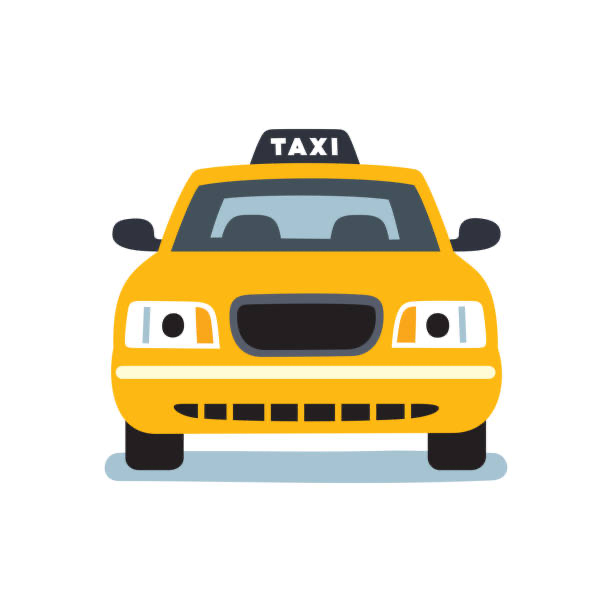

# Часть 1

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Считаем данные

In [10]:
df = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


## Исследование данных

### Quiz

Сколько строк в таблице df?

**Ответ:** 615962

In [11]:
# ваш код здесь
df.shape

(615962, 8)

### Quiz

Есть ли пропущенные значения в таблице? В скольких столбцах есть пропуски?

In [12]:
# ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615962 entries, 0 to 615961
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                615962 non-null  object 
 1   pickup_datetime    615962 non-null  object 
 2   pickup_longitude   615962 non-null  float64
 3   pickup_latitude    615961 non-null  float64
 4   dropoff_longitude  615959 non-null  float64
 5   dropoff_latitude   615959 non-null  float64
 6   passenger_count    615961 non-null  float64
 7   fare_amount        615961 non-null  float64
dtypes: float64(6), object(2)
memory usage: 37.6+ MB


### Quiz

Удалите строки с пропущенными значениями из таблицы. Сколько строк осталось в таблице?

In [13]:
# ваш код здесь
df = df.dropna()
df.shape


(615959, 8)

Удалите из данных колонку `key`, так как в ней дублируется информация из `pickup_datetime`

In [14]:
# ваш код здесь
df.drop(columns=['key'], inplace=True)


Обработайте колонку `pickup_datetime`. Выделите из нее 4 новых столбца:

* `year` - год поездки
* `month` - месяц поездки
* `day` - день поездки
* `hour` - час поездки. Час вычисляйте так: если до следующего часа осталось меньше 30 минут (на секунды не смотрим), что час округляете до следующего.

Пример: 14:18:20 -> 14 часов, 17:48:29 -> 18 часов

Затем удалите столбец `pickup_datetime`.



In [15]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


In [16]:
# ваш код здесь
# Конвертируем pickup_datetime в datetime формат
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Извлекаем компоненты даты/времени
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day

# Обрабатываем часы с округлением
df['hour'] = df['pickup_datetime'].dt.hour + (df['pickup_datetime'].dt.minute >= 30).astype(int)
# Корректируем случаи когда час становится 24
df.loc[df['hour'] == 24, 'hour'] = 0

# Удаляем исходный столбец pickup_datetime
df.drop(columns=['pickup_datetime'], inplace=True)

## Вопросы по данным

### Quiz

В какие годы совершались поездки?

**Ответ:** [2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [17]:
# ваш код здесь
print("Поездки совершались в следующие годы:", sorted(df['year'].unique()))


Поездки совершались в следующие годы: [2009, 2010, 2011, 2012, 2013, 2014, 2015]


### Quiz

В какой час было совершено больше всего поездок?

**Ответ:** 19

In [19]:
df['hour'].mode()

0    19
Name: hour, dtype: int64

In [ ]:
# ваш код здесь
max_trips_hour = df['hour'].mode()
max_trips_count = df['hour'].value_counts().max()

print(f"Час с максимальным количеством поездок: {max_trips_hour}")
print(f"Количество поездок в этот час: {max_trips_count}")

Час с максимальным количеством поездок: 0    19
Name: hour, dtype: int64
Количество поездок в этот час: 38581


### Quiz

В какой сезон (зима, весна, лето, осень) было совершено наименьшее число поездок?

**Ответ:** осень

In [38]:
# ваш код здесь
# Создаем словарь для определения сезонов
seasons = {
    12: 'Зима', 1: 'Зима', 2: 'Зима',
    3: 'Весна', 4: 'Весна', 5: 'Весна',
    6: 'Лето', 7: 'Лето', 8: 'Лето',
    9: 'Осень', 10: 'Осень', 11: 'Осень'
}

# Добавляем столбец с сезонами
df['season'] = df['month'].map(seasons)

# Подсчитываем количество поездок по сезонам
season_counts = df['season'].value_counts()
df.drop(columns=['season'], inplace=True)

# Находим сезон с минимальным количеством поездок
min_season = season_counts.idxmin()
min_trips = season_counts.min()

print(f"Количество поездок по сезонам:")
print(season_counts)
print(f"\nНаименьшее число поездок: {min_season.lower()} - {min_trips}")


Количество поездок по сезонам:
season
Весна    172242
Зима     153973
Лето     146371
Осень    143373
Name: count, dtype: int64

Наименьшее число поездок: осень - 143373


Постройте scatter plot в осях `pickup_latitude` и `pickup_longitude`

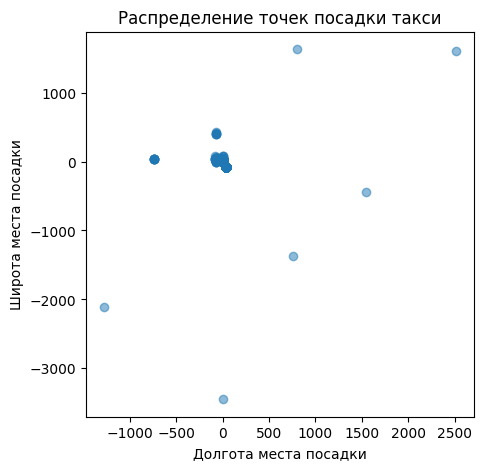

In [28]:
# ваш код здесь
plt.figure(figsize=(5, 5))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=0.5)
plt.xlabel('Долгота места посадки')
plt.ylabel('Широта места посадки')
plt.title('Распределение точек посадки такси')
plt.show()


### Quiz

Постройте ящик с усами boxplot для `pickup_longitude`. Есть ли на визуализации выбросы? (отдельные точки)

**Ответ:** Да

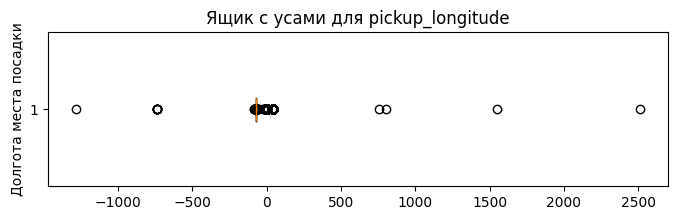

In [32]:
# ваш код здесь
plt.figure(figsize=(8, 2))
plt.boxplot(df['pickup_longitude'], vert=False)
plt.ylabel('Долгота места посадки')
plt.title('Ящик с усами для pickup_longitude')
plt.show()


### Quiz

Чему равна медиана `pickup_longitude`? Ответ округлите до тысячных.

**Ответ:** -73.982

In [33]:
# ваш код здесь
median_pickup_longitude = df['pickup_longitude'].median()
print(f"Медиана pickup_longitude: {median_pickup_longitude:.3f}")


Медиана pickup_longitude: -73.982


Постройте гистограмму распределения признака `hour`.

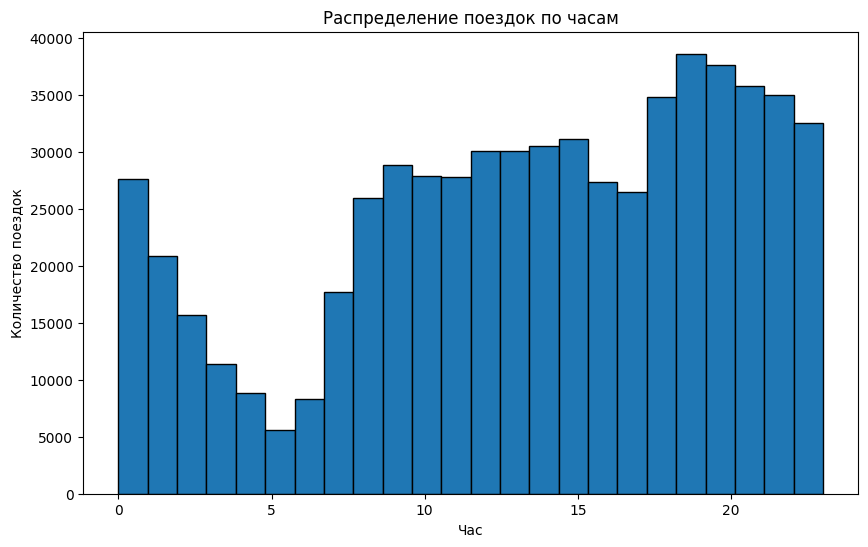

In [34]:
# ваш код здесь
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, edgecolor='black')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.title('Распределение поездок по часам')
plt.show()


## Построение baseline-модели

Разбейте `df` на матрицу объект-признак `X` и вектор с целевой переменной `y`. Целевая переменная - столбец `fare_amount`.

In [40]:
# ваш код здесь
# Создаем матрицу признаков X, исключая целевую переменную fare_amount
X = df.drop('fare_amount', axis=1)

# Создаем вектор целевой переменной y
y = df['fare_amount']


Разбейте данные на тренировочную и тестовую части с помощью train_test_split.

Тестовая часть - 25% всех данных, `random_state=42`.

Сколько строк в матрице `X_train`?

**Ответ:** 461969

In [41]:
# ваш код здесь
from sklearn.model_selection import train_test_split

# Разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Выводим размер тренировочной выборки
print(X_train.shape[0])


461969


### Quiz

Обучите решающее дерево глубины 3 на тренировочных данных и вычислите ошибку $R^2$ на тесте. Ответ округлите до сотых.

Зафиксируйте у дерева `random_state=42`.

**Ответ:** R2 score: 0.50

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# ваш код здесь
# Создаем и обучаем дерево решений
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = tree.predict(X_test)

# Вычисляем R2 на тесте
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.2f}')

R2 score: 0.50


### Quiz

Постройте гистограмму важности признаков.

Какой признак имеет наибольший вес?

**Ответ:** dropoff_longitude

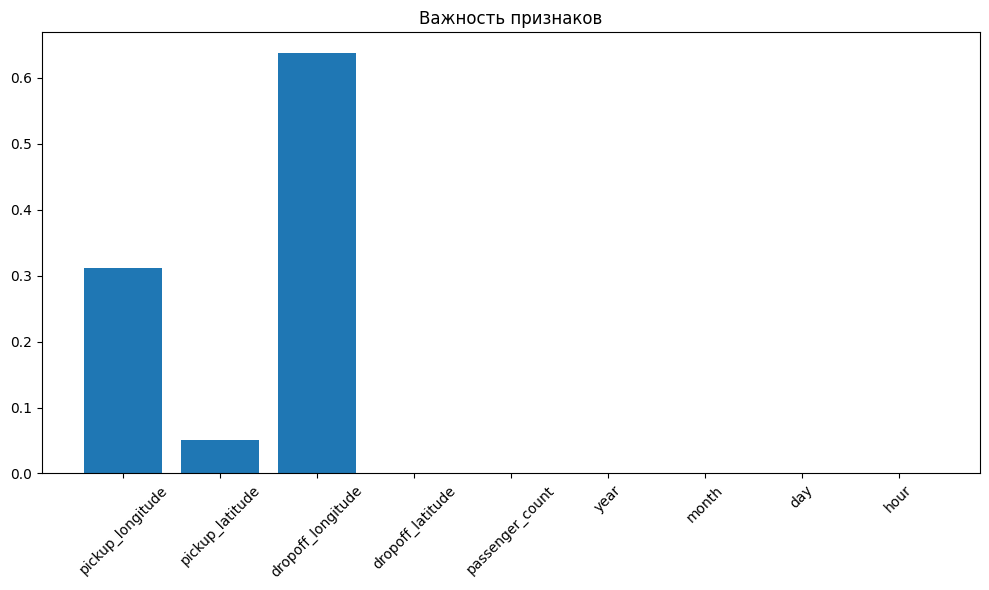

In [43]:
# ваш код здесь
import matplotlib.pyplot as plt

# Получаем важности признаков
feature_importances = tree.feature_importances_
X['dropoff_longitude']
# Создаем список имен признаков
feature_names = X.columns

# Создаем график
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=45)
plt.title('Важность признаков')
plt.tight_layout()
plt.show()


## Улучшение модели

### Quiz

Постройте гистограмму распределения целевой переменной `y`, укажите параметр `bins=100`.

Является ли распределение нормальным?

**Ответ:** нет

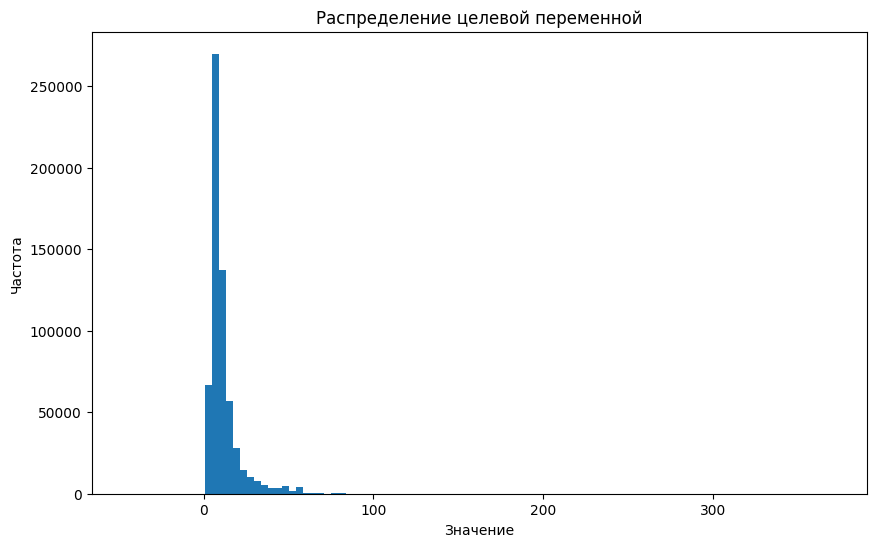

In [44]:
# ваш код здесь
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(y, bins=100)
plt.title('Распределение целевой переменной')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


Замените все значения $y$, меньшие 0, на 0.

Сделайте преобразование целевой переменной по правилу $y_{new} = np.log1p(y)$

Заново разбейте данные на тренировочную и тестовую часть по тем же правилам, что и раньше, но теперь используйте `X` и `y_new`.

In [52]:
# ваш код здесь
import numpy as np

# Заменяем отрицательные значения на 0
y[y < 0] = 0

# Преобразуем целевую переменную
y_new = np.log1p(y)

# Разбиваем данные на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=42)

/var/folders/zc/p2mfk5gx5f1cf_g75s52h3940000gn/T/ipykernel_39210/3946660597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y < 0] = 0


### Quiz

Заново обучите решающее дерево глубины 3 с `random_state=42` на тренировочных данных и вычислите $R^2$ на тесте. Ответ округлите до сотых.

Перед вычислением $R^2$ сделайте обратное преобразование от прогноза: `np.expm1(pred)` и от `y_test`.

**Важно:** дальше мы будем работать с преобразованной целевой переменной, поэтому при вычислении $R^2$ во всех заданиях ниже делайте обратное преобразование.

**Ответ:** 0.44

In [54]:
# ваш код здесь
from sklearn.tree import DecisionTreeRegressor

# Обучаем дерево решений
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Делаем прогноз
pred = tree.predict(X_test)

# Делаем обратное преобразование
pred_orig = np.expm1(pred)
y_test_orig = np.expm1(y_test)

# Вычисляем R2
r2 = r2_score(y_test_orig, pred_orig)
print(f'R2 score: {r2:.2f}')

R2 score: 0.44


### Quiz


Подберите по кросс-валидации на тренировочных данных глубину дерева в диапазоне от 3 до 10 включительно с шагом 1 (`random_state=42`).

`cv=3, scoring=r2`

Затем примените модель с оптимальной глубиной на тесте и вычислите $R^2$. Ответ округлите до сотых.

Перед вычислением $R^2$ не забудьте (как и дальше) делать преобразование `np.expm1`

**Ответ:** 0.69

In [55]:
# ваш код здесь
from sklearn.model_selection import GridSearchCV

# Создаем словарь с параметрами для поиска
param_grid = {'max_depth': range(3, 11)}

# Создаем модель дерева
tree_cv = DecisionTreeRegressor(random_state=42)

# Создаем объект GridSearchCV
grid_search = GridSearchCV(tree_cv, param_grid, cv=3, scoring='r2')

# Обучаем модель
grid_search.fit(X_train, y_train)

# Получаем лучшие параметры
best_depth = grid_search.best_params_['max_depth']
print(f'Оптимальная глубина дерева: {best_depth}')

# Делаем прогноз с использованием лучшей модели
pred = grid_search.predict(X_test)

# Делаем обратное преобразование
pred_orig = np.expm1(pred)
y_test_orig = np.expm1(y_test)

# Вычисляем R2
r2 = r2_score(y_test_orig, pred_orig)
print(f'R2 score: {r2:.2f}')


Оптимальная глубина дерева: 10
R2 score: 0.69


## Усложнение пайплайна

Создайте pipeline, в котором сначала извлеките полиномиальные признаки степени 2 из данных, а затем обучите решающее дерево глубины 3 с `random_state=42`.

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

### Quiz

Обучите pipeline на тренировочных данных, сделайте прогноз на тесте и вычислите $R^2$. Ответ округлите до сотых.

**Ответ:** 0.42

In [57]:
# ваш код здесь
# Обучаем пайплайн
p1.fit(X_train, y_train)

# Делаем прогноз
pred = p1.predict(X_test)

# Делаем обратное преобразование
pred_orig = np.expm1(pred)
y_test_orig = np.expm1(y_test)

# Вычисляем и выводим R2
r2 = r2_score(y_test_orig, pred_orig)
print(f'R2 score: {r2:.2f}')


R2 score: 0.42


При помощи GridSearchCV с теми же гиперпараметрами, что и раньше, подберите глубину дерева внутри пайплайна в диапазоне от 3 до 10 включительно с шагом 1.

In [ ]:
# ваш код здесь
from sklearn.model_selection import GridSearchCV

# Определяем параметры для поиска
param_grid = {
    'model__max_depth': range(3, 11)
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(p1, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Обучаем модель
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Лучшая глубина дерева: 10
Лучший R2 score: 0.71


### Quiz

Выведите $R^2$ лучшего результата на тесте. Ответ округлите до сотых.

**Ответ:** 0.71 (глубина 10)

In [60]:
# ваш код здесь
# Делаем прогноз с лучшими параметрами
pred = grid_search.predict(X_test)

# Делаем обратное преобразование
pred_orig = np.expm1(pred)
y_test_orig = np.expm1(y_test)

# Вычисляем и выводим R2
r2 = r2_score(y_test_orig, pred_orig)
print(f'Лучшая глубина дерева: {grid_search.best_params_["model__max_depth"]}')
print(f'Лучший R2 score: {r2:.2f}')

Лучшая глубина дерева: 10
Лучший R2 score: 0.71


## Feature selection

Добавьте в предыдущий пайплайн:
* после добавления полиномиальных признаков - StandardScaler
* затем - снижение размерности при помощи метода `SelectFromModel` с моделью `Ridge` с гиперпараметрами по умолчанию.

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

# ваш код здесь
# Создаем пайплайн с полиномиальными признаками, стандартизацией и отбором признаков
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(Ridge())),
    ('model', DecisionTreeRegressor(random_state=42))
])


Обучите пайплайн на тренировочных данных, сделайте прогноз на тесте и вычислите для него $R^2$.

In [62]:
# Обучаем пайплайн на тренировочных данных
pipeline.fit(X_train, y_train)

# Делаем прогноз на тестовых данных
pred = pipeline.predict(X_test)

# Делаем обратное преобразование
pred_orig = np.expm1(pred)
y_test_orig = np.expm1(y_test)

# Вычисляем и выводим R2
r2 = r2_score(y_test_orig, pred_orig)
print(f'R2 score: {r2:.2f}')

R2 score: 0.61


Подберите глубину решающего дерева в пайплайне, в том же диапазоне и теми же гиперпараметрами GridSearch, что и в предыдущих заданиях.

Вычислите $R^2$ на тестовых данных, ответ округлите до сотых.

In [63]:
# ваш код здесь
# Создаем параметры для поиска по сетке
param_grid = {
    'model__max_depth': range(3, 11)
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Обучаем модель с поиском по сетке
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('selector',
                                        SelectFromModel(estimator=Ridge())),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1, param_grid={'model__max_depth': range(3, 11)},
             scoring='r2', verbose=1)

In [64]:
# ваш код здесь
# Делаем прогноз с лучшими параметрами
pred = grid_search.predict(X_test)

# Делаем обратное преобразование
pred_orig = np.expm1(pred)
y_test_orig = np.expm1(y_test)

# Вычисляем и выводим R2
r2 = r2_score(y_test_orig, pred_orig)
print(f'R2 score: {r2:.2f}')

# Выводим лучшие параметры
print(f'Best parameters: {grid_search.best_params_}')

R2 score: 0.71
Best parameters: {'model__max_depth': 10}


### Quiz

Удалось ли при помощи пайплайна с отбором признаков улучшить результат предыдущей лучшей модели?

**Ответ:** нет (0.71)

## Кодирование категориальных признаков

Признаки `month`, `day`, `hour` - категориальные (подумайте почему!)

Поэтому их можно попробовать закодировать.

Попробуем подход: группировка значений признака + дальнейшая OneHot-кодировка.

* Создайте колонки `winter`, `spring`, `summer`, `autumn` - в каждую из которых пишите 1, если месяц относится к сезону, и 0 иначе.

* Создайте колонки `start_month`, `middle_month`, `end_month` - в каждую колонку пишите 1, если день относится к началу месяца (1-10 число), середине месяца (11-20 число), концу месяца (от 21 числа), и 0 иначе.

* Создайте колонки `night`, `morning`, `day`, `evening` по аналогии. Если час - от 23 до 5, то это `night`, от 6 до 11 - `morning`, от 12 до 16 - `day`, от 17 до 22 - `evening`.

После создания новых колонок удалите колонки `month`, `day`, `hour`.

P.S. Отдельно делайте преобразования для X_train и для X_test, чтобы заново не разбивать данные.

In [65]:
# ваш код здесь
# Создаем сезонные признаки
def add_season(df):
    winter = (df['month'].isin([12, 1, 2])).astype(int)
    spring = (df['month'].isin([3, 4, 5])).astype(int) 
    summer = (df['month'].isin([6, 7, 8])).astype(int)
    autumn = (df['month'].isin([9, 10, 11])).astype(int)
    return winter, spring, summer, autumn

# Создаем признаки для периода месяца
def add_month_period(df):
    start = (df['day'] <= 10).astype(int)
    middle = ((df['day'] > 10) & (df['day'] <= 20)).astype(int)
    end = (df['day'] > 20).astype(int)
    return start, middle, end

# Создаем признаки времени суток
def add_day_period(df):
    night = ((df['hour'] >= 23) | (df['hour'] <= 5)).astype(int)
    morning = ((df['hour'] >= 6) & (df['hour'] <= 11)).astype(int)
    day = ((df['hour'] >= 12) & (df['hour'] <= 16)).astype(int)
    evening = ((df['hour'] >= 17) & (df['hour'] <= 22)).astype(int)
    return night, morning, day, evening

# Применяем преобразования для X_train
X_train['winter'], X_train['spring'], X_train['summer'], X_train['autumn'] = add_season(X_train)
X_train['start_month'], X_train['middle_month'], X_train['end_month'] = add_month_period(X_train)
X_train['night'], X_train['morning'], X_train['day'], X_train['evening'] = add_day_period(X_train)

# Применяем преобразования для X_test
X_test['winter'], X_test['spring'], X_test['summer'], X_test['autumn'] = add_season(X_test)
X_test['start_month'], X_test['middle_month'], X_test['end_month'] = add_month_period(X_test)
X_test['night'], X_test['morning'], X_test['day'], X_test['evening'] = add_day_period(X_test)

# Удаляем исходные категориальные признаки
X_train = X_train.drop(['month', 'day', 'hour'], axis=1)
X_test = X_test.drop(['month', 'day', 'hour'], axis=1)


### Quiz

На сколько признаков стало больше в матрице-объект признак после добавления закодированных категориальных столбцов и удаления исходных категориальных столбцов?

---
Было 3 категориальных признака (month, day, hour)
Добавили 11 новых признаков:
- 4 для сезонов (winter, spring, summer, autumn)
- 3 для периода месяца (start_month, middle_month, end_month)
- 4 для времени суток (night, morning, day, evening)
Удалили 3 исходных признака
Итого: +8 признаков (11 новых - 3 удаленных)


Подберите при помощи GridSearch с теми же гиперпараметрами, что и выше, оптимальную глубину дерева в диапазоне от 3 до 10 включительно (с шагом 1). У дерева `random_state=42`.

In [89]:
import sklearn
sklearn.set_config(enable_metadata_routing=True)

In [109]:
pipeline2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(estimator=Ridge())),
    ('model', DecisionTreeRegressor(random_state=42))
], )

# Задаем параметры для поиска
param_grid = {
    'model__max_depth': range(3, 11)
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(pipeline2, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Обучаем модель
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('selector',
                                        SelectFromModel(estimator=Ridge())),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1, param_grid={'model__max_depth': range(3, 11)},
             scoring='r2', verbose=1)

Постройте гистограмму важности признаков для полученной модели (лучшей по GridSearch).

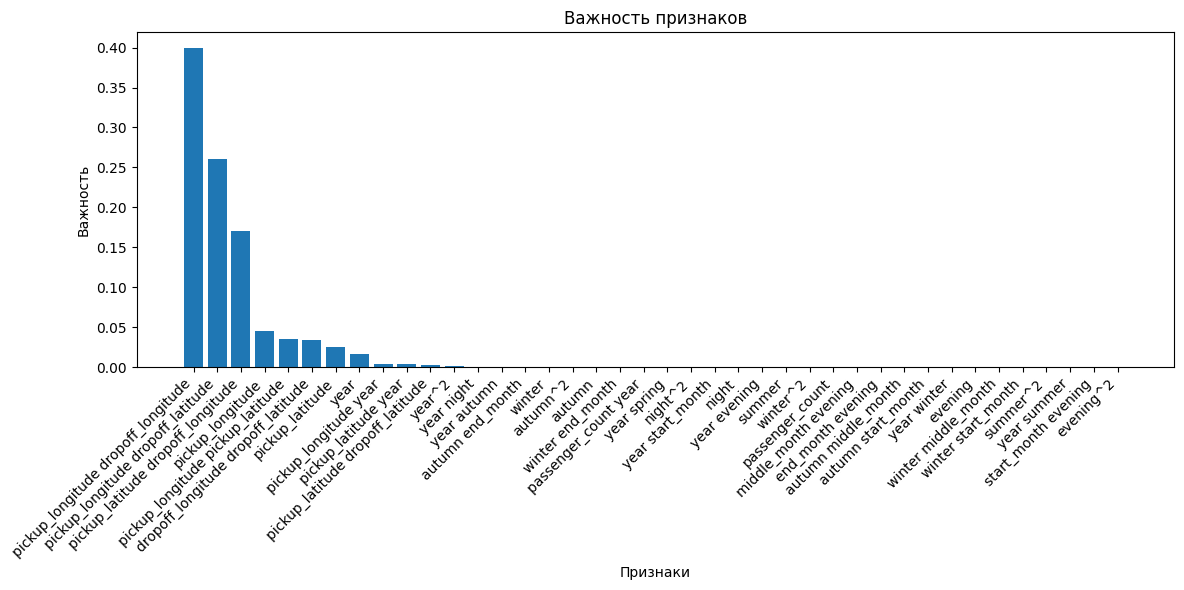

In [127]:
# Получаем лучшую модель из GridSearch
best_model = grid_search.best_estimator_

# Получаем важности признаков из лучшей модели
importances = best_model.named_steps['model'].feature_importances_

# Получаем имена признаков после преобразований
feature_names = best_model.named_steps['selector'].get_feature_names_out(best_model.named_steps['poly'].get_feature_names_out())

# Создаем DataFrame с важностями признаков
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Строим гистограмму
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

### Quiz

Какой из признаков, связанных с датой поездки, самый важный для модели?

**Ответ:** Year

## Кластеризация и визуализация

Оставьте только те строчки в таблице df (после удаления пропусков), для которых выполнены оба условия:

* `dropoff_latitude` $\in (39;41)$
* `dropoff_longitude` $\in (-75;-72)$

### Quiz

Сколько строк осталось в таблице?

**Ответ:** 603729

In [111]:
# ваш код здесь
# Фильтруем данные по условиям
df = df[(df['dropoff_latitude'] > 39) & (df['dropoff_latitude'] < 41) & 
        (df['dropoff_longitude'] > -75) & (df['dropoff_longitude'] < -72)]

print(df.shape[0])


603729


Разбейте все поездки по признакам `dropoff_latitude`, `dropoff_longitude` на 5 кластеров.

Используйте kmeans c `random_state=42`.

Визуализируйте поездки из таблицы df в осях `dropoff_latitude`, `dropoff_longitude` - покрасьте точки в цвета, соответствующие кластерам.

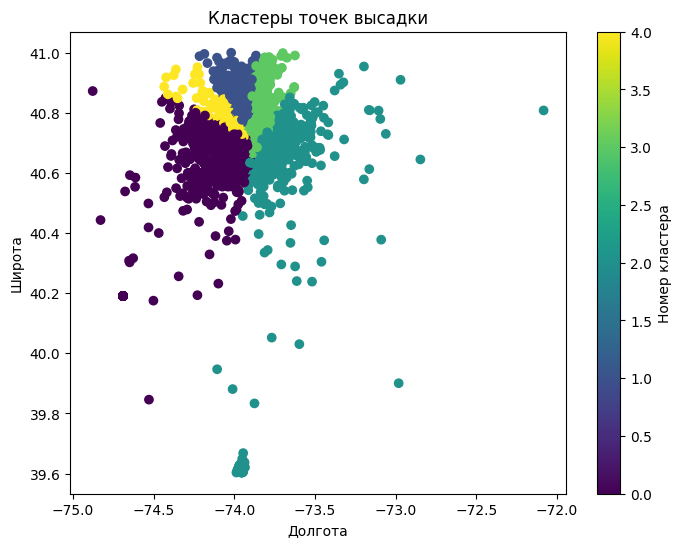

In [129]:
# ваш код здесь
# Создаем объект KMeans и обучаем модель
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df[['dropoff_latitude', 'dropoff_longitude']])

# Визуализируем результаты
plt.figure(figsize=(8, 6))
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c=clusters, cmap='viridis')
plt.title('Кластеры точек высадки')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.colorbar(label='Номер кластера')
plt.show()


### Quiz

Для каждого кластера вычислите среднюю стоимость поездки.

Чему равна самая большая средняя стоимость поездки по кластерам? Ответ округлите до целого числа.

**Ответ:** 40

In [130]:
# ваш код здесь
# Добавляем метки кластеров в датафрейм
df['cluster'] = clusters

# Вычисляем среднюю стоимость поездки для каждого кластера
avg_fares = df.groupby('cluster')['fare_amount'].mean()

print("Средняя стоимость поездки по кластерам:")
print(avg_fares)

# Находим максимальную среднюю стоимость
max_fare = round(avg_fares.max())
print(f"\nМаксимальная средняя стоимость: {max_fare}")

Средняя стоимость поездки по кластерам:
cluster
0    12.549306
1    10.347561
2    40.102965
3    23.921432
4     9.582697
Name: fare_amount, dtype: float64

Максимальная средняя стоимость: 40


Отдельно нарисуйте кластер с наибольшей средней стоимостью поездки. В нем выделяется два островка.

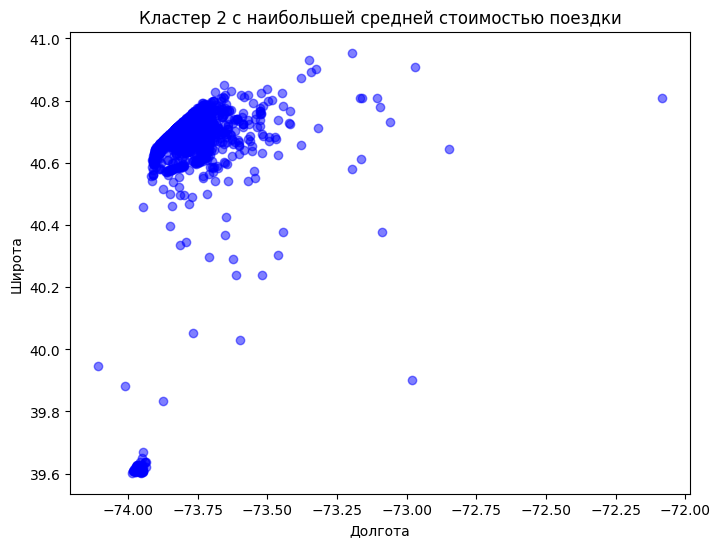

In [131]:
# Находим кластер с наибольшей средней стоимостью
cluster_max = avg_fares.idxmax()

# Выбираем данные только для этого кластера
cluster_data = df[df['cluster'] == cluster_max]

# Визуализируем этот кластер
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data['dropoff_longitude'], 
           cluster_data['dropoff_latitude'],
           c='blue', alpha=0.5)
plt.title(f'Кластер {cluster_max} с наибольшей средней стоимостью поездки')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

### Quiz

Кластеризуйте точки этого кластера при помощи DBSCAN с гиперпараметрами `eps`=0.15, `min_samples`=10.

Нарисуйте результат.

Вычислите координаты центра (среднее арифметрическое) меньшего кластера.

В ответе укажите `dropoff_latitude`, округленную до тысячных.

**Ответ:** 39.616

/var/folders/zc/p2mfk5gx5f1cf_g75s52h3940000gn/T/ipykernel_39210/342357936.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['dbscan_cluster'] = labels


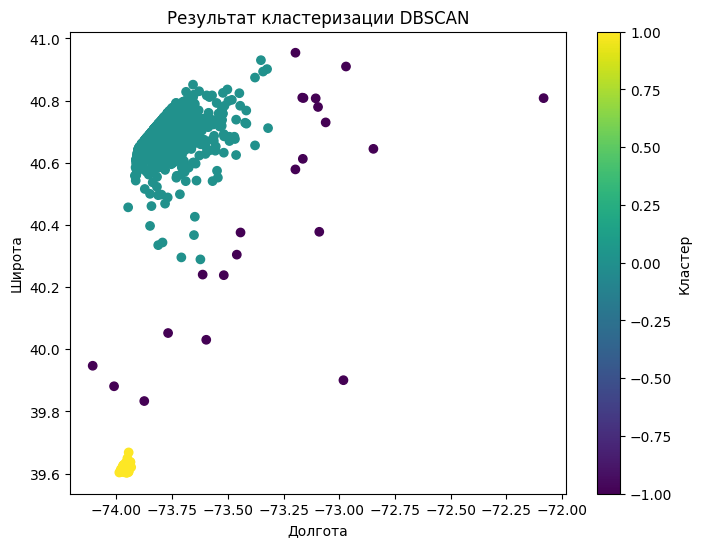


Размеры кластеров:
dbscan_cluster
 0    6952
 1      57
-1      22
Name: count, dtype: int64

Широта центра меньшего кластера (округленная до тысячных): 39.616


In [132]:
# Применяем DBSCAN к точкам кластера с максимальной стоимостью
from sklearn.cluster import DBSCAN

# Создаем DBSCAN с заданными параметрами
dbscan = DBSCAN(eps=0.15, min_samples=10)

# Подготавливаем данные для кластеризации
X = cluster_data[['dropoff_longitude', 'dropoff_latitude']].values

# Выполняем кластеризацию
labels = dbscan.fit_predict(X)

# Добавляем метки кластеров в DataFrame
cluster_data['dbscan_cluster'] = labels

# Визуализируем результат
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data['dropoff_longitude'], 
           cluster_data['dropoff_latitude'],
           c=cluster_data['dbscan_cluster'], 
           cmap='viridis')
plt.title('Результат кластеризации DBSCAN')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.colorbar(label='Кластер')
plt.show()

# Находим размеры кластеров
cluster_sizes = cluster_data['dbscan_cluster'].value_counts()
print("\nРазмеры кластеров:")
print(cluster_sizes)

# Находим меньший кластер (исключая шум с меткой -1)
smaller_cluster = cluster_sizes[cluster_sizes.index != -1].idxmin()

# Вычисляем центр меньшего кластера
smaller_cluster_data = cluster_data[cluster_data['dbscan_cluster'] == smaller_cluster]
center_lat = smaller_cluster_data['dropoff_latitude'].mean()

print(f"\nШирота центра меньшего кластера (округленная до тысячных): {round(center_lat, 3)}")

# Часть 2

## Творческая (но обязательная) часть

В работе мы построили baseline-модель, потом попытались ее улучшить, усложнив пайплайн увеличением, а затем снижением размерности. Но попробовали мы лишь малую часть из всех возможных подходов, а также всего лишь одну модель - решающее дерево.

В этой части задания вам предлагается не ограничивать себя идеями, попробованными выше:
* придумывайте новые признаки
* пробуйте разные кодировки признаков
* снижайте размерность и делайте отбор признаков
* пробуйте разные модели
* комбинируйте подходы

У вас есть знания целого курса для работы над задачей, ни в чем вас не ограничиваем!

Ваша цель - построить модель, дающую наилучший скор $R^2$ на тестовых данных (с фиксированным разбиением на train-test, указанным в коде ноутбука выше).

In [ ]:
# ваш код здесь

### Итоговый отчет

Результаты исследований, проведенных в творческой части задания, оформите в виде отчета. Отчет - это текстовый документ (желательно, google docs - чтобы мы могли при ревью оставлять в нем комментарии), не ноутбук!

В отчете по пунктам должны быть отражены ваши действия при решении задачи:

1) Какие подходы попробовали - перечислить, описать

2) Какие подходы сработали, какие нет

3) Какой пайплайн дал наилучший результат? Какого качества удалось добиться?

4) Интерпретация важности признаков для наилучшего пайплайна. Какие признаки оказались наиболее важны для модели, какие нет? Как вы думаете почему?

Отчет пишется в свободной форме. В отчет можно включать визуализации, если считаете нужным.

Удачи!